In [1]:
import os
import fnmatch
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pdb

In [2]:
#Generally, star 1 should be the brighter star.
id_star1 = 830
id_star2 = 1864
#id_star3 = 3665 #Optional 3rd(blend) star
jack_img_num = 24
dt = 9.9204 #follow-up obs = 2021jul14

In [3]:
data_dict = {}
star1_list = []
star2_list = []
star3_list = []
jackknife_list = []

#Loop through each jackknife *.als file.
for i in range(jack_img_num):
    data_dict[i] = np.loadtxt('mag_OB110950_{0}_kp_tdOpen.als'.format(i+1), skiprows=3)
    for j in data_dict[i]:
        if j[0] == id_star1:
            star1_list.append(j[0:5])
    for j in data_dict[i]:
        if j[0] == id_star2:
            star2_list.append(j[0:5])
# If 3-star jackknife, uncomment loop below (and 3-star jackknife_list below):            
#    for j in data_dict[i]:
#        if j[0] == id_star3:
#            star3_list.append(j[0:5])
            
#Stack star1 and star2 horizontally in new jackknife_list
jackknife_list = np.hstack((star1_list, star2_list))
np.savetxt('jackknife_vals.dat', jackknife_list, fmt='%3s', header="id1, x1, y1, m1, me1, id2, x2, y2, m2, me2")
#-------
#print(len(star2_list))
#print(star2_list)

#star2_list = np.delete(star2_list, (6), axis=0)
#print(len(star2_list))
#print(star2_list)
#3-star jackknife list below here:
#jackknife_list = np.hstack((star1_list, star2_list, star3_list))
#np.savetxt('jackknife_vals.dat', jackknife_list, fmt='%3s', header="id1, x1, y1, m1, me1, id2, x2, y2, m2, me2, id3, x3, y3, m3, me3")

#print(len(jackknife_list))

jackknife_list = np.delete(jackknife_list, (8), axis=0) #remove outlier (optional).
jack_img_num = 23
print(len(jackknife_list))

23


In [4]:
#Calculate means and uncertainties for x,y,m,dx,dy,dm via Equation 3 in Bhattacharya et al. 2021.

x1bar = np.mean(jackknife_list[:,1])
y1bar = np.mean(jackknife_list[:,2])
m1bar = np.mean(jackknife_list[:,3])

x2bar = np.mean(jackknife_list[:,6])
y2bar = np.mean(jackknife_list[:,7])
m2bar = np.mean(jackknife_list[:,8])

x1err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 1] - x1bar)**2))
y1err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 2] - y1bar)**2))
m1err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 3] - m1bar)**2))

x2err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 6] - x2bar)**2))
y2err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 7] - y2bar)**2))
m2err = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((jackknife_list[:, 8] - m2bar)**2))

#-------------
#Star 1-2 jackknife calc
#-------------
dx12 = (jackknife_list[:, 1] - jackknife_list[:, 6])
dy12 = (jackknife_list[:, 2] - jackknife_list[:, 7])
dm12 = (jackknife_list[:, 8] - jackknife_list[:, 3])
mtot12 = -2.5*np.log10(((10**(-0.4*jackknife_list[:, 3]))+(10**(-0.4*jackknife_list[:, 8]))))
fratio12 = (10**(-0.4*jackknife_list[:, 8])/(10**(-0.4*jackknife_list[:, 3])))

dxbar12 = np.mean((jackknife_list[:, 1] - jackknife_list[:, 6]))
dybar12 = np.mean((jackknife_list[:, 2] - jackknife_list[:, 7]))
dmbar12 = np.mean((jackknife_list[:, 8] - jackknife_list[:, 3]))
mtotbar12 = np.mean(-2.5*np.log10(((10**(-0.4*jackknife_list[:, 3]))+(10**(-0.4*jackknife_list[:, 8])))))
fratiobar12 = np.mean((10**(-0.4*jackknife_list[:, 8])/(10**(-0.4*jackknife_list[:, 3]))))

In [5]:
dxerr12 = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((dx12 - dxbar12)**2))
dyerr12 = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((dy12 - dybar12)**2))
dmerr12 = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((dm12 - dmbar12)**2))
mtoterr12 = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((mtot12 - mtotbar12)**2))
fratioerr12 = np.sqrt(((jack_img_num - 1)/(jack_img_num))*np.sum((fratio12 - fratiobar12)**2))


In [6]:
#Print results
print("#POSITIONS & MAGNITUDES:")
print("")
print("x1 =", x1bar, "+-", x1err, "pix")
print("y1 =", y1bar, "+-", y1err, "pix")
print("m1=", m1bar, "+-", m1err)
print("-------------------------")
print("x2 =", x2bar, "+-", x2err, "pix")
print("y2 =", y2bar, "+-", y2err, "pix")
print("m2=", m2bar, "+-", m2err)
print("-------------------------")
print("")
print("#SEPARATIONS & FLUX RATIOS:")
print("")
print("dx = x1 - x2 =", dxbar12, "+-", dxerr12, "pix")
print("dy = y1 - y2 =", dybar12, "+-", dyerr12, "pix")
print("#-------------------------")
print("mu_rel,HE =", (dxbar12*9.942)/dt, "+-", (dxerr12*9.942)/dt, "mas/yr")
print("mu_rel,HN =", (dybar12*9.942)/dt, "+-", (dyerr12*9.942)/dt, "mas/yr")
print("mu_rel,H =", np.sqrt((dxbar12)**2 + (dybar12)**2)*9.942/dt, "+-", np.sqrt((dxerr12)**2 + (dyerr12)**2)*9.942/dt, "mas/yr")
print("#-------------------------")
print("dm = m1 - m2 =", dmbar12, "+-", dmerr12)
print("m_total =", mtotbar12, "+-", mtoterr12)
print("flux ratio = f1 / f2 =", fratiobar12, "+-", fratioerr12)
print("#-------------------------")

#POSITIONS & MAGNITUDES:

x1 = 1105.789 +- 0.1329530809688533 pix
y1 = 1065.964 +- 0.027489128285875557 pix
m1= 12.877304347826088 +- 0.016794318960242884
-------------------------
x2 = 1104.1144347826087 +- 0.1407928400825787 pix
y2 = 1062.0667391304348 +- 0.03793447738761512 pix
m2= 13.109739130434786 +- 0.019717091699944254
-------------------------

#SEPARATIONS & FLUX RATIOS:

dx = x1 - x2 = 1.6745652173913186 +- 0.02765654873780154 pix
dy = y1 - y2 = 3.897260869565215 +- 0.03946686294002224 pix
#-------------------------
mu_rel,HE = 1.6782113010871023 +- 0.027716766214187224 mas/yr
mu_rel,HN = 3.9057464986509984 +- 0.039552795386244614 mas/yr
mu_rel,H = 4.2510291557246465 +- 0.04829744043153885 mas/yr
#-------------------------
dm = m1 - m2 = 0.23243478260869574 +- 0.021149928385208416
m_total = 12.234736312480265 +- 0.014795878401513305
flux ratio = f1 / f2 = 0.8072904784690472 +- 0.015712553626090857
#-------------------------


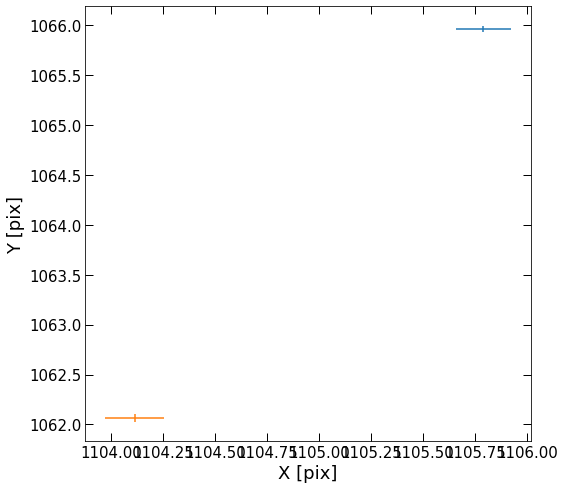

In [7]:
#Plot Results
fig = plt.subplots(figsize=(8,8))
plt.errorbar(x1bar,y1bar,xerr=x1err,yerr=y1err)
plt.errorbar(x2bar,y2bar,xerr=x2err,yerr=y2err)

#plt.xlim(1140,1180)
#plt.ylim(1240,1245)
plt.xlabel('X [pix]', fontsize=18)
plt.ylabel('Y [pix]', fontsize=18)
plt.tick_params(which='both', length=8, width=1, labelsize=15, direction='in', right=True, top=True)

plt.show()